2. This qusetion involves the use of multiple linear regression on the Auto data set.

(a) Produce a scatterplot matrix which includes all of the variables in the data set. 

산점도 행렬은 여러 변수 간의 관계를 시각적으로 확인하는 데 유용하다.

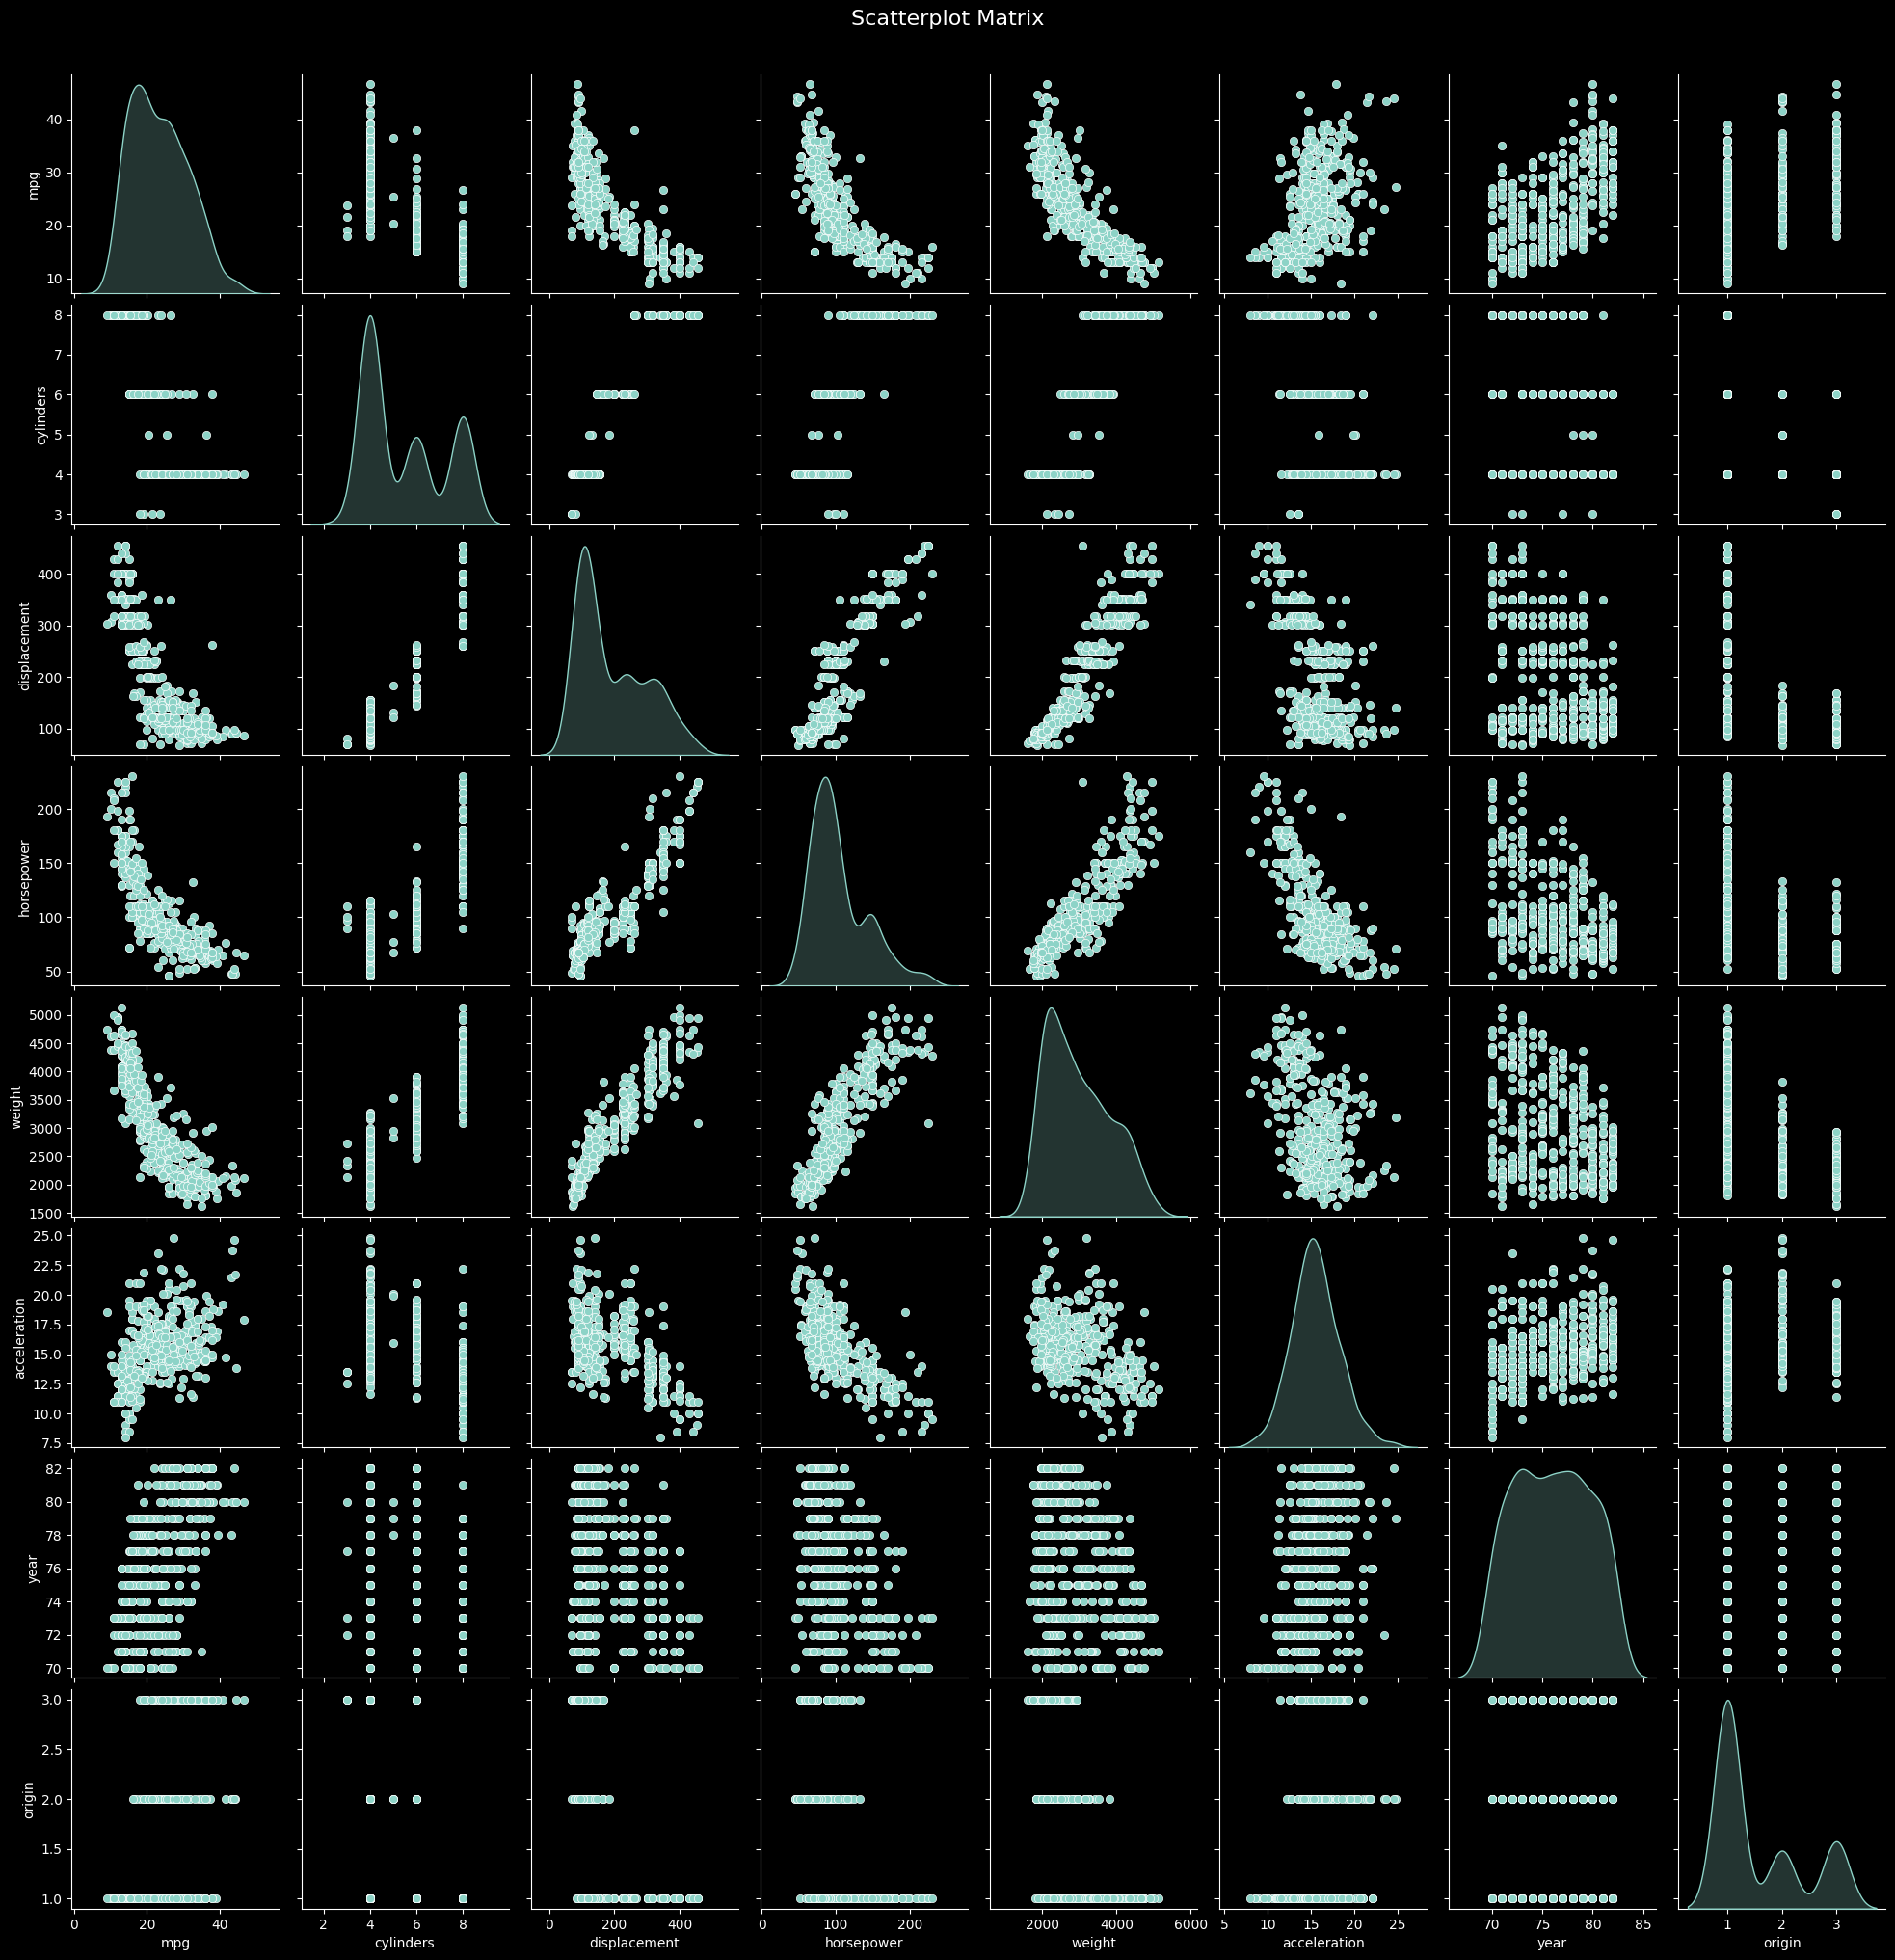

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드 및 정제
auto = pd.read_csv("C:/Users/bikmi/Desktop/Bigdata_HW/HW2/Auto.csv")
auto["horsepower"] = pd.to_numeric(auto["horsepower"], errors="coerce")
auto.dropna(inplace=True)  # 결측값 제거


# 산점도 행렬 생성 (name 열 제외)
sns.pairplot(auto.drop("name", axis=1), diag_kind="kde", height=2.5)
plt.suptitle("Scatterplot Matrix", y=1.02, fontsize=16)
plt.show()

(b) Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, which is qualitative. 

상관관계 행렬은 각 변수 간의 상관 정도를 수치로 나타낸다. name 변수는 제외한다.

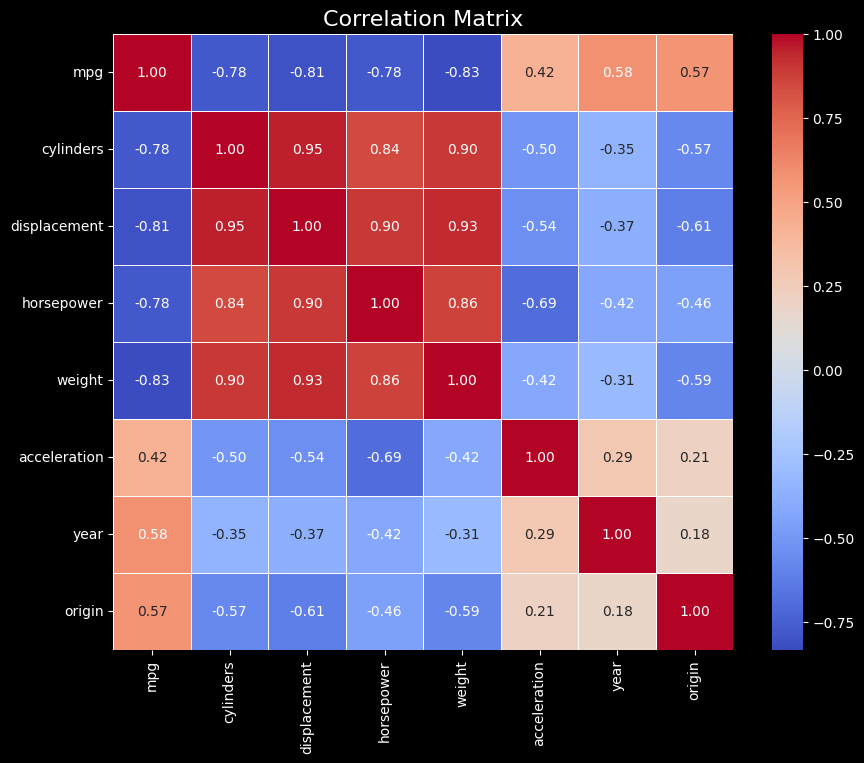

In [3]:
# 상관관계 행렬 계산 (name 열 제외)
corr_matrix = auto.drop("name", axis=1).corr()

# 상관관계 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

(c) Use the lm() function to perform a multiple linear regression with mpg as the response and all other variable except name as the predictors. Use the summary() function to print the results. Comment on the output. For instance:

mpg를 종속 변수로, name을 제외한 나머지 변수를 독립 변수로 사용하여 다중 선형 회귀 분석을 수행한다.

In [4]:
import statsmodels.api as sm

# X: 예측 변수들 (name 제외)
X = auto.drop(["mpg", "name"], axis=1)
X = sm.add_constant(X)  # 절편 추가

# y: 종속 변수 (mpg)
y = auto["mpg"]

# 다중 선형 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 모델 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 13 Oct 2024   Prob (F-statistic):          2.04e-139
Time:                        15:16:27   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

const는 회귀 모델에서 절편(intercept)을 의미한다. 이는 모든 독립 변수의 값이 0일 때, 종속 변수(mpg)의 예측값을 의미한다. 

i. Is there a relationship between the predictors and the response?

F-statistic과 p-value를 사용하여 전체 회귀 모델이 유의미한지 확인한다.
p-value가 0.05 미만이면 전체 모델이 유의미한 것이다.

In [5]:
print(f"모델의 F-statistic p-value: {model.f_pvalue:.4f}")
relationship = "있음" if model.f_pvalue < 0.05 else "없음"
print(f"(i) 예측 변수와 반응 변수 간의 관계가 {relationship}.")

모델의 F-statistic p-value: 0.0000
(i) 예측 변수와 반응 변수 간의 관계가 있음.


ii. Which predictors appear to have a stastically significant relationship to the rsponse?

각 예측 변수의 p-value를 확인해 0.05 미만인 변수가 유의미하다고 판단한다.

In [6]:
print("\n(ii) 유의미한 예측 변수:")
significant_vars = model.pvalues[model.pvalues < 0.05].index
for var in significant_vars:
    print(f"- {var}: p-value = {model.pvalues[var]:.4f}")


(ii) 유의미한 예측 변수:
- const: p-value = 0.0002
- displacement: p-value = 0.0084
- weight: p-value = 0.0000
- year: p-value = 0.0000
- origin: p-value = 0.0000


iii. What dose the coefficient for the year variable suggest?

year 변수의 계수 값이 양수이면, year가 증가할수록 mpg가 증가하는 경향이 있음을 의미한다.

In [7]:
year_coef = model.params["year"]
print(f"(iii) year 변수의 회귀 계수: {year_coef:.4f}")

if year_coef > 0:
    print("→ year가 증가할수록 mpg가 증가하는 경향이 있습니다.")
else:
    print("→ year가 증가할수록 mpg가 감소하는 경향이 있습니다.")

(iii) year 변수의 회귀 계수: 0.7508
→ year가 증가할수록 mpg가 증가하는 경향이 있습니다.


(d) Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations woth unusally high leverage?

잔차 플롯과 Leverage plot(레버리지 플롯)을 통해 이상치(Outliers)와 레버리지 높은 데이터를 탐색한다.

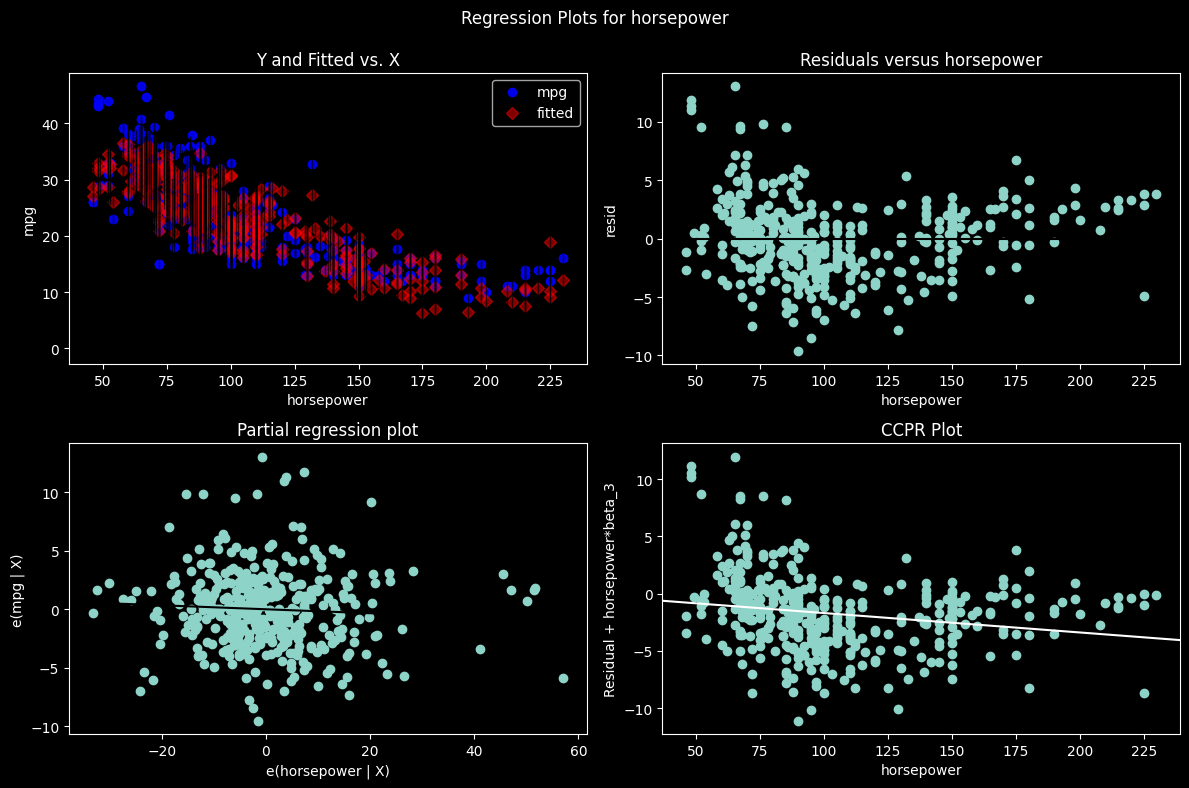

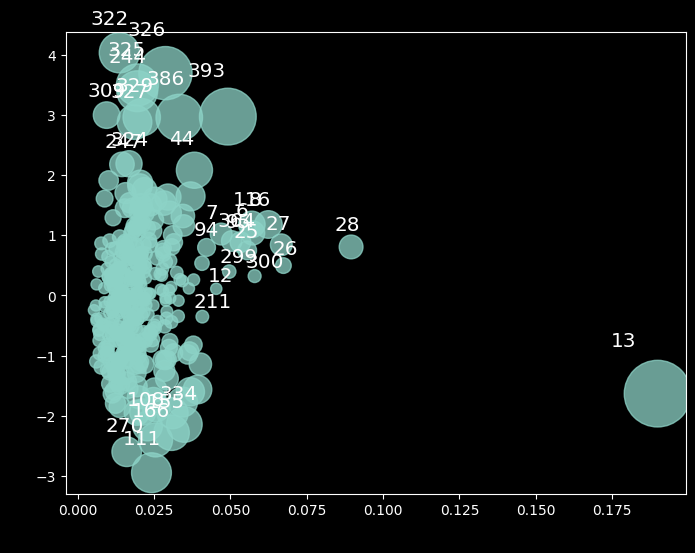

In [8]:
import statsmodels.api as sm

# 잔차 플롯 및 진단 플롯 생성
fig = sm.graphics.plot_regress_exog(
    model, "horsepower", fig=plt.figure(figsize=(12, 8))
)
plt.show()

# 영향도 분석 (Leverage plot)
fig, ax = plt.subplots(figsize=(8, 6))
sm.graphics.influence_plot(model, ax=ax, criterion="cooks")
plt.title("Leverage Plot")
plt.show()

1. 비선형성 문제: 잔차 플롯에서 뚜렷한 선형 패턴이 보이지 않고, 여러 구간에서 데이터가 밀집된 패턴을 보인다. 이는 단순 선형 회귀가 적절하지 않음을 시사한다.
해결 방법: 다항 회귀(Polynomial Regression) 또는 변수 변환(로그, 제곱근)을 시도할 수 있다.

2. 이상치와 레버리지 관측값:
13번 관측값이 높은 레버리지와 큰 영향력을 가지고 있다. 이러한 데이터는 회귀 모델의 결과를 왜곡할 수 있다.
해결 방법: 해당 관측값을 제거하거나 모델을 조정하는 것이 좋습니다.

3. 잔차의 무작위성 부족:
잔차 플롯이 무작위로 퍼지지 않으며, 특정한 패턴을 보이고 있다. 이는 모델의 부적합성을 시사한다.


(e) Use the * and : symbols to fit linear regression models with interactions effects. Do any interactions appear to be stastically significant?

 p-value의 의미
p-value는 귀무가설(null hypothesis)이 참이라는 가정 하에, 관측된 데이터(또는 더 극단적인 결과)가 나타날 확률이다.

귀무가설: 상호작용 효과가 없다. (즉, 두 변수 간의 상호작용이 반응 변수에 영향을 미치지 않는다.)
대립가설: 상호작용 효과가 있다. (즉, 두 변수 간의 상호작용이 반응 변수에 영향을 미친다.)

p-value가 작을수록:
귀무가설이 참일 확률이 매우 낮다는 의미이다.
보통 p-value < 0.05를 기준으로 귀무가설을 기각하고 대립가설을 채택한다.


In [15]:
import statsmodels.formula.api as smf
from itertools import combinations

# 사용할 변수 목록 (name 제외)
variables = [
    "cylinders",
    "displacement",
    "horsepower",
    "weight",
    "acceleration",
    "year",
    "origin",
]

# 상호작용 조합 생성 및 유의미한 결과 도출
significant_interactions = []


# 모든 2변수 상호작용에 대해 회귀 모델 적합
for var1, var2 in combinations(variables, 2):
    # 상호작용을 포함한 회귀 모델 식 정의
    formula = f"mpg ~ {var1} * {var2}"

    # 회귀 모델 적합
    model = smf.ols(formula=formula, data=auto).fit()

    # 상호작용 항목의 p-value 확인
    interaction_term = f"{var1}:{var2}"
    p_value = model.pvalues.get(interaction_term)

    # 유의미한 상호작용 항목 저장 (p-value < 0.05)
    if p_value is not None and p_value < 0.05:
        significant_interactions.append((interaction_term, p_value))

# 유의미한 상호작용 항목 출력
if significant_interactions:
    print("\n유의미한 상호작용 효과 (p-value < 0.05):")
    for term, p_value in significant_interactions:
        print(f"- {term}: p-value = {p_value:.4f}")
else:
    print("\n유의미한 상호작용 효과를 찾을 수 없습니다.")


유의미한 상호작용 효과 (p-value < 0.05):
- cylinders:displacement: p-value = 0.0000
- cylinders:horsepower: p-value = 0.0000
- cylinders:weight: p-value = 0.0000
- cylinders:year: p-value = 0.0020
- displacement:horsepower: p-value = 0.0000
- displacement:weight: p-value = 0.0000
- displacement:acceleration: p-value = 0.0000
- displacement:year: p-value = 0.0000
- displacement:origin: p-value = 0.0006
- horsepower:weight: p-value = 0.0000
- horsepower:acceleration: p-value = 0.0000
- horsepower:year: p-value = 0.0000
- horsepower:origin: p-value = 0.0000
- weight:acceleration: p-value = 0.0043
- weight:year: p-value = 0.0000
- weight:origin: p-value = 0.0423


(f) Try a few different transformtions of the variables, such as log(X), root(X), X^2. Comment on your findings.

In [16]:
import numpy as np
import statsmodels.api as sm

# 사용될 7개 변수 목록
variables = [
    "cylinders",
    "displacement",
    "horsepower",
    "weight",
    "acceleration",
    "year",
    "origin",
]

# 1. 로그 변환 모델
for var in variables:
    auto[f"log_{var}"] = np.log(
        auto[var].replace(0, np.nan)
    )  # 0을 NaN으로 대체해 로그 변환 오류 방지

X_log = auto[[f"log_{var}" for var in variables]].dropna()  # NaN이 있는 행 제거
X_log = sm.add_constant(X_log)  # 절편 추가
model_log = sm.OLS(auto.loc[X_log.index, "mpg"], X_log).fit()
print("\n로그 변환 모델:")
print(model_log.summary())

# 2. 제곱근 변환 모델
for var in variables:
    auto[f"sqrt_{var}"] = np.sqrt(auto[var])

X_sqrt = auto[[f"sqrt_{var}" for var in variables]]
X_sqrt = sm.add_constant(X_sqrt)  # 절편 추가
model_sqrt = sm.OLS(auto["mpg"], X_sqrt).fit()
print("\n제곱근 변환 모델:")
print(model_sqrt.summary())

# 3. 제곱 변환 모델
for var in variables:
    auto[f"{var}_squared"] = auto[var] ** 2

X_squared = auto[[f"{var}_squared" for var in variables]]
X_squared = sm.add_constant(X_squared)  # 절편 추가
model_squared = sm.OLS(auto["mpg"], X_squared).fit()
print("\n제곱 변환 모델:")
print(model_squared.summary())


로그 변환 모델:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     306.5
Date:                Sun, 13 Oct 2024   Prob (F-statistic):          6.67e-153
Time:                        19:47:46   Log-Likelihood:                -991.70
No. Observations:                 392   AIC:                             1999.
Df Residuals:                     384   BIC:                             2031.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -66.5643  